In [1]:
import matplotlib.pyplot as plt
import numpy as np

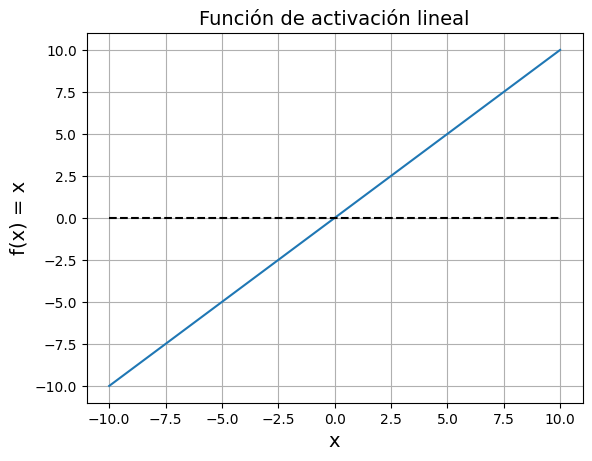

In [2]:
x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Función de activación lineal', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()